In [1]:
import pandas as pd
import numpy as np
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# read the by dong count aggregation data (left)
df_OD_count = pd.read_csv('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/aggregated_Dong-Dong count_2023_03_ver2.csv')

# read indices_with_Engname data (right)
df_name = pd.read_csv('/content/drive/MyDrive/FMC_Data/ADMI_202303.csv')

In [3]:
df_OD_count.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT
0,11110515,11110515,13045.84,52744.40,139766.81,126720.97,-73976.57
1,11110515,11110530,11888.65,12368.02,108223.86,96335.21,-83967.19
2,11110515,11110540,1498.43,2483.60,27594.13,26095.70,-23612.10
3,11110515,11110550,1207.86,12662.17,14987.79,13779.93,-1117.76
4,11110515,11110560,1033.45,12025.93,7057.94,6024.49,6001.44


In [4]:
df_name.head()

,SIDO_NM,SGG_NM,ADMI_NM,ADMI_CD,FULL_NM,BASE_YM
0,서울특별시,종로구,청운효자동,11110515,서울특별시 종로구 청운효자동,202303
1,서울특별시,종로구,사직동,11110530,서울특별시 종로구 사직동,202303
2,서울특별시,종로구,삼청동,11110540,서울특별시 종로구 삼청동,202303
3,서울특별시,종로구,부암동,11110550,서울특별시 종로구 부암동,202303
4,서울특별시,종로구,평창동,11110560,서울특별시 종로구 평창동,202303


In [5]:
# Combine 'sido' and 'gu' columns with a space in between
df_name['full_gu_name'] = df_name['SIDO_NM'] + ' ' + df_name['SGG_NM']
df_name.head()

,SIDO_NM,SGG_NM,ADMI_NM,ADMI_CD,FULL_NM,BASE_YM,full_gu_name
0,서울특별시,종로구,청운효자동,11110515,서울특별시 종로구 청운효자동,202303,서울특별시 종로구
1,서울특별시,종로구,사직동,11110530,서울특별시 종로구 사직동,202303,서울특별시 종로구
2,서울특별시,종로구,삼청동,11110540,서울특별시 종로구 삼청동,202303,서울특별시 종로구
3,서울특별시,종로구,부암동,11110550,서울특별시 종로구 부암동,202303,서울특별시 종로구
4,서울특별시,종로구,평창동,11110560,서울특별시 종로구 평창동,202303,서울특별시 종로구


In [6]:
# Merge origin dong's gu name on the df_OD_count
selected_cols_to_merge = ['ADMI_CD', 'full_gu_name', 'SIDO_NM', 'SGG_NM']
merged_df = pd.merge(df_OD_count, df_name[selected_cols_to_merge], left_on = 'O_ADMDONG_CD', right_on = 'ADMI_CD', how = 'left')
merged_df = merged_df.drop(columns=['ADMI_CD'])
columns_to_rename = {col: col + '_orig' for col in selected_cols_to_merge if col != 'ADMI_CD'}
merged_df = merged_df.rename(columns=columns_to_rename)
merged_df.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT,full_gu_name_orig,SIDO_NM_orig,SGG_NM_orig
0,11110515,11110515,13045.84,52744.40,139766.81,126720.97,-73976.57,서울특별시 종로구,서울특별시,종로구
1,11110515,11110530,11888.65,12368.02,108223.86,96335.21,-83967.19,서울특별시 종로구,서울특별시,종로구
2,11110515,11110540,1498.43,2483.60,27594.13,26095.70,-23612.10,서울특별시 종로구,서울특별시,종로구
3,11110515,11110550,1207.86,12662.17,14987.79,13779.93,-1117.76,서울특별시 종로구,서울특별시,종로구
4,11110515,11110560,1033.45,12025.93,7057.94,6024.49,6001.44,서울특별시 종로구,서울특별시,종로구


In [7]:
# Merge destination dong's gu name on the df_OD_count
merged_df = pd.merge(merged_df, df_name[selected_cols_to_merge], left_on = 'D_ADMDONG_CD', right_on = 'ADMI_CD', how = 'left')
merged_df = merged_df.drop(columns=['ADMI_CD'])
columns_to_rename = {col: col + '_dest' for col in selected_cols_to_merge if col != 'ADMI_CD'}
merged_df = merged_df.rename(columns=columns_to_rename)
merged_df.head()

,O_ADMDONG_CD,D_ADMDONG_CD,CNT_1,CNT_3,CNT_24567,RT-NonWork_CNT,RT-Work_CNT,full_gu_name_orig,SIDO_NM_orig,SGG_NM_orig,full_gu_name_dest,SIDO_NM_dest,SGG_NM_dest
0,11110515,11110515,13045.84,52744.40,139766.81,126720.97,-73976.57,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구
1,11110515,11110530,11888.65,12368.02,108223.86,96335.21,-83967.19,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구
2,11110515,11110540,1498.43,2483.60,27594.13,26095.70,-23612.10,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구
3,11110515,11110550,1207.86,12662.17,14987.79,13779.93,-1117.76,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구
4,11110515,11110560,1033.45,12025.93,7057.94,6024.49,6001.44,서울특별시 종로구,서울특별시,종로구,서울특별시 종로구,서울특별시,종로구


In [ ]:
# Aggregate

In [8]:
unique_full_gu_name_orig = merged_df['full_gu_name_orig'].nunique()
unique_full_gu_name_orig

249

In [9]:
unique_full_gu_name_dest = merged_df['full_gu_name_dest'].nunique()
unique_full_gu_name_dest

249

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204373 entries, 0 to 3204372
Data columns (total 13 columns):
 #   Column             Dtype  
---  ------             -----  
 0   O_ADMDONG_CD       int64  
 1   D_ADMDONG_CD       int64  
 2   CNT_1              float64
 3   CNT_3              float64
 4   CNT_24567          float64
 5   RT-NonWork_CNT     float64
 6   RT-Work_CNT        float64
 7   full_gu_name_orig  object 
 8   SIDO_NM_orig       object 
 9   SGG_NM_orig        object 
 10  full_gu_name_dest  object 
 11  SIDO_NM_dest       object 
 12  SGG_NM_dest        object 
dtypes: float64(5), int64(2), object(6)
memory usage: 317.8+ MB


In [11]:
# Filter rows where 'RT-NonWork_CNT' is negative
negative_rt_nonwork_cnt = merged_df[merged_df['RT-NonWork_CNT'] < 0]

# Count the number of such rows
num_negative_rt_nonwork_cnt = negative_rt_nonwork_cnt.shape[0]

print(f"Number of rows with negative 'RT-NonWork_CNT': {num_negative_rt_nonwork_cnt}")

Number of rows with negative 'RT-NonWork_CNT': 0


In [13]:
# Calculate total non-work trips for each origin
total_origin_trips = merged_df.groupby('full_gu_name_orig')['RT-NonWork_CNT'].sum()

# Calculate total non-work trips where origin = destination
self_trips = merged_df[merged_df['full_gu_name_orig'] == merged_df['full_gu_name_dest']].groupby('full_gu_name_orig')['RT-NonWork_CNT'].sum()

# Calculate self-containment for each area
self_containment = self_trips / total_origin_trips
self_containment = self_containment.fillna(0)  # fill NaN values with 0

# Calculate total non-work trips for each destination, excluding trips where origin = destination
total_dest_trips = merged_df[merged_df['full_gu_name_orig'] != merged_df['full_gu_name_dest']].groupby('full_gu_name_dest')['RT-NonWork_CNT'].sum()

# Calculate total non-work trips for each destination
total_trips = merged_df.groupby('full_gu_name_dest')['RT-NonWork_CNT'].sum()

# Calculate pull-effect for each area
pull_effect = total_dest_trips / (total_trips - total_dest_trips)
pull_effect = pull_effect.fillna(0)  # fill NaN values with 0

In [14]:
self_containment.head()

,RT-NonWork_CNT
full_gu_name_orig,
강원도 강릉시,0.0
강원도 고성군,0.0
강원도 동해시,0.0
강원도 삼척시,0.0
강원도 속초시,0.0


In [15]:
df_indices = pd.DataFrame({
    'full_gu_name_orig': self_containment.index,
    'Self-Containment': self_containment.values,
    'Pull-Effect': pull_effect.reindex(self_containment.index).values # Reindex to align with self_containment
})

In [16]:
# filtering out inf pull-effect and zero self-containment
df_indices = df_indices.replace([np.inf, -np.inf], np.nan)  # replace 'inf' with NaN
df_indices = df_indices[(df_indices['Self-Containment'] != 0) & (df_indices['Pull-Effect'].notna())]

In [17]:
df_indices

,full_gu_name_orig,Self-Containment,Pull-Effect
18,경기도 가평군,0.575166,0.970118
19,경기도 고양시 덕양구,0.584331,0.818866
20,경기도 고양시 일산동구,0.511600,1.012002
21,경기도 고양시 일산서구,0.494312,1.043781
22,경기도 과천시,0.429139,1.323299
...,...,...,...
175,인천광역시 부평구,0.518926,0.905462
176,인천광역시 서구,0.606394,0.501313
177,인천광역시 연수구,0.627814,0.710111
178,인천광역시 옹진군,0.591951,0.847400


## Visualization

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

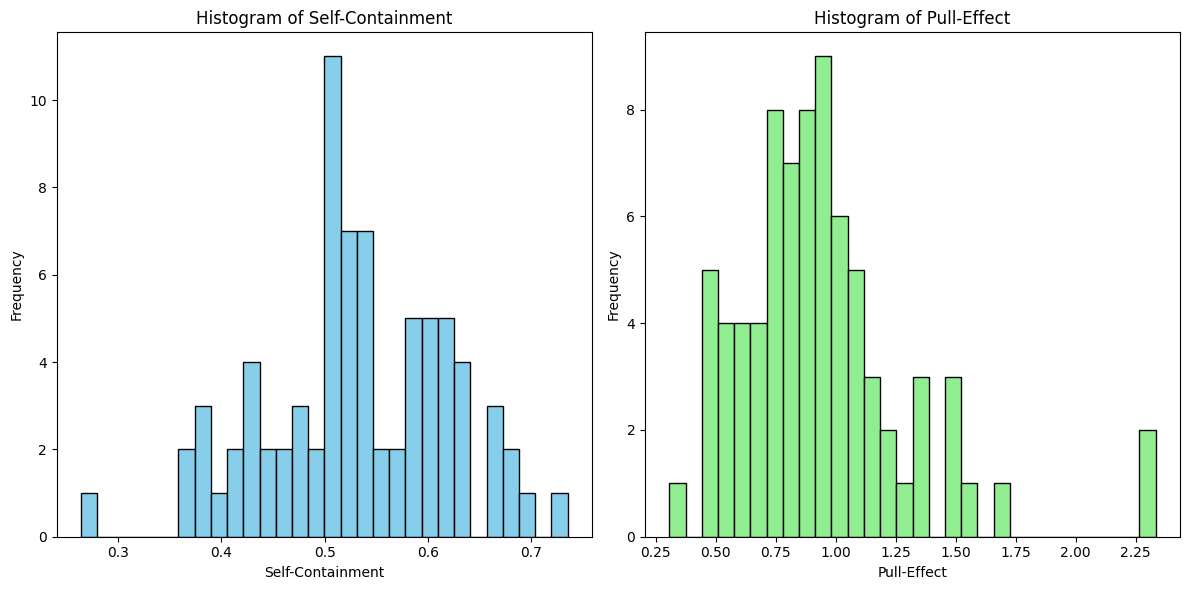

In [32]:
# distribution of indices using histograms
# Plotting the histogram for 'Self-Containment'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_indices['Self-Containment'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Self-Containment')
plt.xlabel('Self-Containment')
plt.ylabel('Frequency')

# Plotting the histogram for 'Pull-Effect'
plt.subplot(1, 2, 2)
plt.hist(df_indices['Pull-Effect'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Pull-Effect')
plt.xlabel('Pull-Effect')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<ipython-input-33-795746fa67d4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_indices['Self-Containment'], shade=True, color='skyblue')
<ipython-input-33-795746fa67d4>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_indices['Pull-Effect'], shade=True, color='lightgreen')


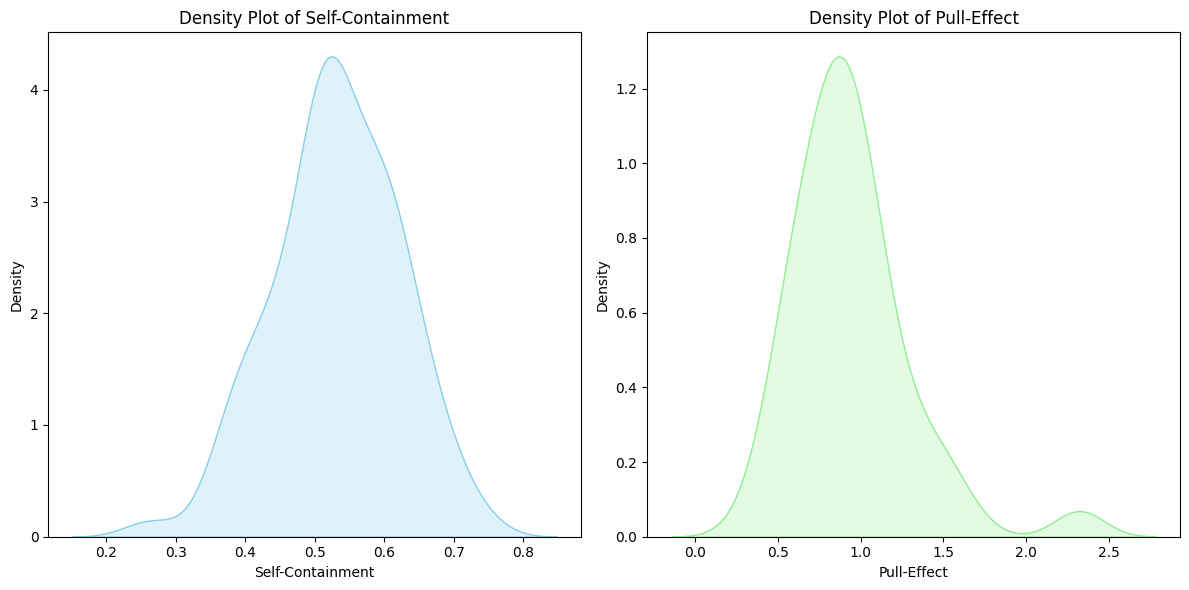

In [33]:
# Plotting the density plot for 'Self-Containment'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(df_indices['Self-Containment'], shade=True, color='skyblue')
plt.title('Density Plot of Self-Containment')
plt.xlabel('Self-Containment')
plt.ylabel('Density')

# Plotting the density plot for 'Pull-Effect'
plt.subplot(1, 2, 2)
sns.kdeplot(df_indices['Pull-Effect'], shade=True, color='lightgreen')
plt.title('Density Plot of Pull-Effect')
plt.xlabel('Pull-Effect')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

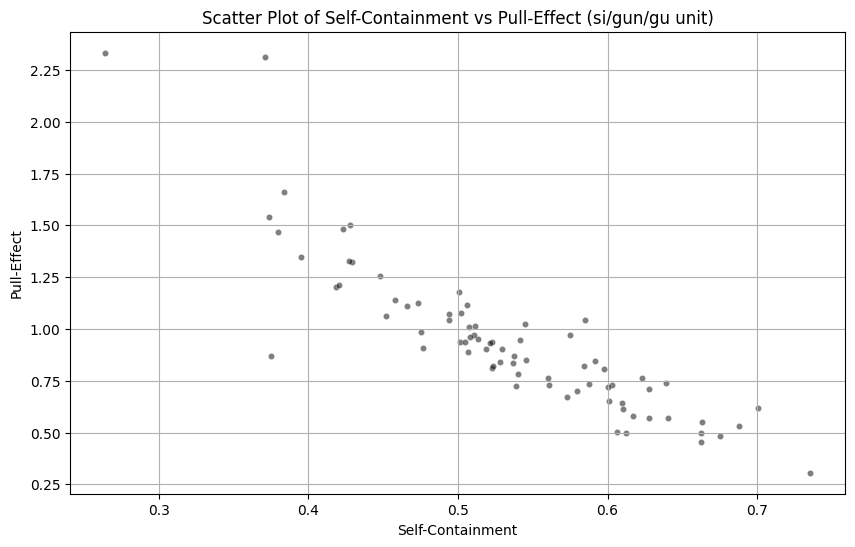

In [26]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_indices, x='Self-Containment', y='Pull-Effect', color='black', alpha=0.5, s=20)
plt.title('Scatter Plot of Self-Containment vs Pull-Effect (si/gun/gu unit)')
plt.xlabel('Self-Containment')
plt.ylabel('Pull-Effect')
plt.grid(True)
plt.show()

In [25]:
# Calculate Pearson correlation coefficient
correlation, p_value = pearsonr(df_indices['Self-Containment'], df_indices['Pull-Effect'])
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.2e}")

Pearson correlation coefficient: -0.88
P-value: 2.06e-26


In [27]:
# Pull effect를 오름차순 정렬 후, 그래프 그려보기
# sort pull-effect in ascending order
df_indices = df_indices.sort_values(by='Pull-Effect', ascending=True)
# create the 'inv_rank' column
df_indices['inv_rank'] = range(1, len(df_indices) + 1)
df_indices.head()

,full_gu_name_orig,Self-Containment,Pull-Effect,inv_rank
56,경기도 평택시,0.735281,0.306054,1
27,경기도 김포시,0.662619,0.451939,2
55,경기도 파주시,0.675503,0.482652,3
30,경기도 부천시,0.662288,0.497669,4
59,경기도 화성시,0.612093,0.497798,5


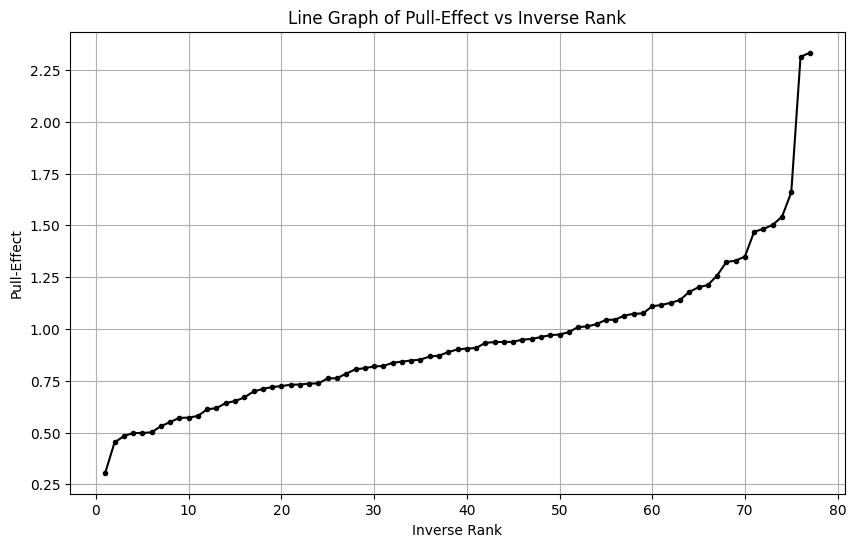

In [30]:
# draw the line graph having y-axis as Pull-Effect
# Plotting the line graph with adjusted marker size and color
plt.figure(figsize=(10, 6))
plt.plot(
    df_indices['inv_rank'],
    df_indices['Pull-Effect'],
    marker='o',
    linestyle='-',
    color='k',
    markerfacecolor='black',
    markeredgecolor='black',
    markersize=3
)
plt.title('Line Graph of Pull-Effect vs Inverse Rank')
plt.xlabel('Inverse Rank')
plt.ylabel('Pull-Effect')
plt.grid(True)
plt.show()

In [18]:
df_indices.to_excel('/content/drive/MyDrive/FMC_Data/M_B_dong_Aggregated_noNan/indices_by_gu_ver2.xlsx', index=False)